In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import os

# Functions and classes for loading and using the Inception model.
import inception

In [2]:
tf.__version__

'1.10.0'

In [3]:
import cv2
from tqdm import tqdm

In [4]:
DATA_DIR="C:\\Users\\Raheel Siddiqi\\fruits_classification\\fruits-360_dataset\\fruits-360\\Training"
CATEGORIES=[]
for category in os.listdir(DATA_DIR):
    CATEGORIES.append(category)

In [5]:
print(CATEGORIES)

['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Red', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Yellow', 'Clementine', 'Cocos', 'Dates', 'Granadilla', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Huckleberry', 'Kaki', 'Kiwi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach Flat', 'Pear', 'Pear Abate', 'Pear Monster', 'Pear Williams', 'Pepino', 'Physalis', 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 'Pitahaya Red', 'Plum', 'Pomegranate', 'Quince', 'Rambutan', 'Raspberry', 'Salak', 'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tan

In [6]:
print(len(CATEGORIES))

72


In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATA_DIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                img_array = cv2.resize(img_array, (64,64))
                new_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

100%|██████████| 490/490 [00:03<00:00, 146.26it/s]


In [8]:
print(len(training_data))

36117


In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

25
40
46
62
30
46
48
60
39
2


In [11]:
IMG_SIZE=64
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y=np.array(y)

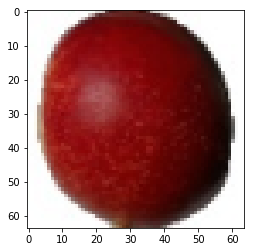

In [12]:
plt.imshow(X[2].reshape(IMG_SIZE,IMG_SIZE,3))
plt.show()

In [13]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(64,64,3), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(CATEGORIES[cls_true[i]])
        else:
            xlabel = "True: {0}, Pred: {1}".format(CATEGORIES[cls_true[i]], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

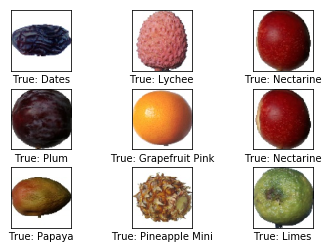

In [14]:
plot_images(X[0:9],y[0:9])

In [15]:
print(X.shape)

(36117, 64, 64, 3)


In [16]:
DATA_DIR_TEST='C:\\Users\\Raheel Siddiqi\\fruits_classification\\fruits-360_dataset\\fruits-360\\Test'
CATEGORIES_TEST=[]

In [17]:
for category in os.listdir(DATA_DIR_TEST):
    CATEGORIES_TEST.append(category)

In [18]:
print(CATEGORIES_TEST)

['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Red', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Yellow', 'Clementine', 'Cocos', 'Dates', 'Granadilla', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Huckleberry', 'Kaki', 'Kiwi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach Flat', 'Pear', 'Pear Abate', 'Pear Monster', 'Pear Williams', 'Pepino', 'Physalis', 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 'Pitahaya Red', 'Plum', 'Pomegranate', 'Quince', 'Rambutan', 'Raspberry', 'Salak', 'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tan

In [19]:
print(len(CATEGORIES_TEST))

72


In [93]:
testing_data=[]

def create_testing_data():
    for category in CATEGORIES_TEST:  # do dogs and cats

        path = os.path.join(DATA_DIR_TEST,category)  # create path to dogs and cats
        class_num = CATEGORIES_TEST.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                img_array = cv2.resize(img_array, (64,64))
                new_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                testing_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_testing_data()

100%|██████████| 166/166 [00:00<00:00, 2183.14it/s]


In [96]:
for sample in testing_data[:200]:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [97]:
IMG_SIZE=64
X_test = []
y_test = []

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)
X_test=np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,3)
y_test=np.array(y_test)

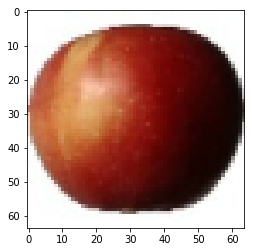

In [98]:
plt.imshow(X_test[6].reshape(IMG_SIZE,IMG_SIZE,3))
plt.show()

In [25]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [100]:
pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [26]:
inception.data_dir = 'inception/'

In [27]:
inception.maybe_download()

Data has apparently already been downloaded and unpacked.


In [28]:
from inception import transfer_values_cache

In [29]:
fruits360_path="data/fruits360/"

In [30]:
file_path_cache_train = os.path.join(fruits360_path, 'inception_fruits360_train.pkl')
file_path_cache_test = os.path.join(fruits360_path, 'inception_fruits360_test.pkl')

In [31]:
model = inception.Inception()

In [32]:
print("Processing Inception transfer-values for training-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_train = transfer_values_cache(cache_path=file_path_cache_train,
                                              images=X,
                                              model=model)

Processing Inception transfer-values for training-images ...
- Processing image:  36117 / 36117
- Data saved to cache-file: data/fruits360/inception_fruits360_train.pkl


In [101]:
print("Processing Inception transfer-values for test-images ...")

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_test = transfer_values_cache(cache_path=file_path_cache_test,
                                             images=X_test,
                                             model=model)

Processing Inception transfer-values for test-images ...
- Processing image:  12132 / 12132
- Data saved to cache-file: data/fruits360/inception_fruits360_test.pkl


In [34]:
transfer_values_train.shape

(36117, 2048)

In [102]:
transfer_values_test.shape

(12132, 2048)

In [103]:
def plot_transfer_values(i):
    print("Input image:")
    
    # Plot the i'th image from the test-set.
    plt.imshow(X_test[i], interpolation='nearest')
    plt.show()

    print("Transfer-values for the image using Inception model:")
    
    # Transform the transfer-values into an image.
    img = transfer_values_test[i]
    img = img.reshape((32, 64))

    # Plot the image for the transfer-values.
    plt.imshow(img, interpolation='nearest', cmap='Reds')
    plt.show()

Input image:


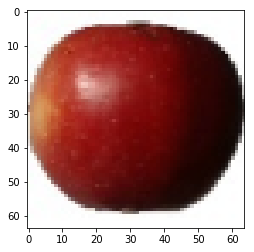

Transfer-values for the image using Inception model:


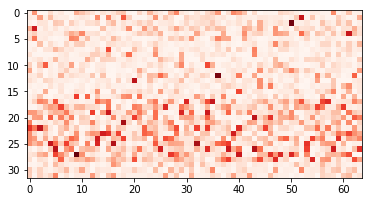

In [104]:
plot_transfer_values(i=16)

Input image:


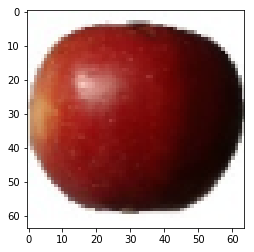

Transfer-values for the image using Inception model:


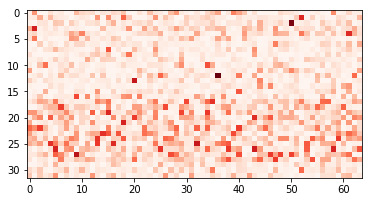

In [105]:
plot_transfer_values(i=17)

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)

In [41]:
transfer_values = transfer_values_train[0:3000]

In [42]:
transfer_values.shape

(3000, 2048)

In [43]:
cls_train = y[0:3000]

In [44]:
transfer_values_reduced = pca.fit_transform(transfer_values)

In [45]:
transfer_values_reduced.shape

(3000, 2)

In [46]:
num_classes=72

In [47]:
def plot_scatter(values, cls):
    # Create a color-map with a different color for each class.
    import matplotlib.cm as cm
    cmap = cm.rainbow(np.linspace(0.0, 1.0, num_classes))

    # Get the color for each sample.
    colors = cmap[cls]

    # Extract the x- and y-values.
    x = values[:, 0]
    y = values[:, 1]

    # Plot it.
    plt.scatter(x, y, color=colors)
    plt.show()

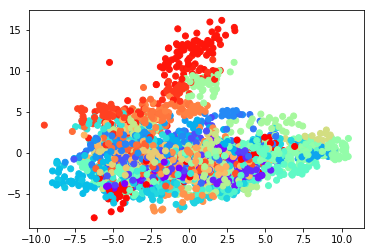

In [48]:
plot_scatter(transfer_values_reduced, cls_train)

In [49]:
from sklearn.manifold import TSNE

In [50]:
pca = PCA(n_components=50)
transfer_values_50d = pca.fit_transform(transfer_values)

In [51]:
tsne = TSNE(n_components=2)

In [52]:
transfer_values_reduced = tsne.fit_transform(transfer_values_50d)

In [53]:
transfer_values_reduced.shape

(3000, 2)

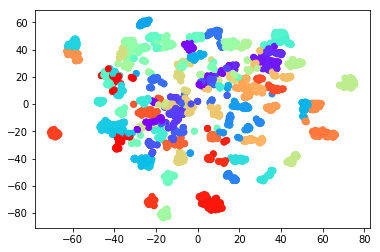

In [54]:
plot_scatter(transfer_values_reduced, cls_train)

In [55]:
x = tf.placeholder(tf.float32, shape=[None, 2048], name='x')

In [56]:
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')

In [57]:
y_true_cls = tf.argmax(y_true, dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [58]:
fc_size=1024

In [59]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))

In [60]:
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [61]:
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

In [62]:
layer_fc1 = new_fc_layer(input=x,
                         num_inputs=2048,
                         num_outputs=fc_size,
                         use_relu=True)

In [63]:
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         use_relu=False)

In [64]:
y_pred = tf.nn.softmax(layer_fc2)

In [65]:
y_pred_cls = tf.argmax(y_pred, axis=1)

In [66]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc2,labels=y_true)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [67]:
loss = tf.reduce_mean(cross_entropy)

In [68]:
global_step = tf.Variable(initial_value=0,name='global_step', trainable=False)

In [69]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss, global_step)

In [70]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [71]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [72]:
session = tf.Session()

In [73]:
session.run(tf.global_variables_initializer())

In [74]:
train_batch_size = 64

In [75]:
from tensorflow.python.keras.utils.np_utils import to_categorical
def random_batch():
    # Number of images (transfer-values) in the training-set.
    num_images = len(transfer_values_train)

    # Create a random index.
    idx = np.random.choice(num_images,
                           size=train_batch_size,
                           replace=False)

    # Use the random index to select random x and y-values.
    # We use the transfer-values instead of images as x-values.
    x_batch = transfer_values_train[idx]
    y_labels=to_categorical(y)
    y_batch = y_labels[idx]

    return x_batch, y_batch

In [76]:
def optimize(num_iterations):
    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images (transfer-values) and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = random_batch()
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        # We also want to retrieve the global_step counter.
        i_global, _ = session.run([global_step, optimizer],
                                  feed_dict=feed_dict_train)

        # Print status to screen every 100 iterations (and last).
        if (i_global % 100 == 0) or (i == num_iterations - 1):
            # Calculate the accuracy on the training-batch.
            batch_acc = session.run(accuracy,
                                    feed_dict=feed_dict_train)

            # Print status.
            msg = "Global Step: {0:>6}, Training Batch Accuracy: {1:>6.1%}"
            print(msg.format(i_global, batch_acc))

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [106]:
from tensorflow.python.keras.utils.np_utils import to_categorical

y_test_labels=to_categorical(y_test)

In [107]:
print(y_test_labels[:2])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [108]:
print(y_test[:2])

[0 0]


In [109]:
feed_dict_test = {x: transfer_values_test,
                  y_true: y_test_labels,
                  y_true_cls: y_test}

In [110]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [111]:
print_accuracy()

Accuracy on test-set: 97.3%


In [84]:
optimize(num_iterations=2500)

Global Step:    100, Training Batch Accuracy:  79.7%
Global Step:    200, Training Batch Accuracy:  93.8%
Global Step:    300, Training Batch Accuracy:  96.9%
Global Step:    400, Training Batch Accuracy: 100.0%
Global Step:    500, Training Batch Accuracy:  98.4%
Global Step:    600, Training Batch Accuracy: 100.0%
Global Step:    700, Training Batch Accuracy:  98.4%
Global Step:    800, Training Batch Accuracy:  96.9%
Global Step:    900, Training Batch Accuracy:  98.4%
Global Step:   1000, Training Batch Accuracy:  96.9%
Global Step:   1100, Training Batch Accuracy: 100.0%
Global Step:   1200, Training Batch Accuracy: 100.0%
Global Step:   1300, Training Batch Accuracy: 100.0%
Global Step:   1400, Training Batch Accuracy: 100.0%
Global Step:   1500, Training Batch Accuracy: 100.0%
Global Step:   1600, Training Batch Accuracy:  98.4%
Global Step:   1700, Training Batch Accuracy: 100.0%
Global Step:   1800, Training Batch Accuracy: 100.0%
Global Step:   1900, Training Batch Accuracy: 

In [112]:
print_accuracy()

Accuracy on test-set: 97.3%


In [113]:
optimize(num_iterations=2500)

Global Step:   2600, Training Batch Accuracy: 100.0%
Global Step:   2700, Training Batch Accuracy: 100.0%
Global Step:   2800, Training Batch Accuracy: 100.0%
Global Step:   2900, Training Batch Accuracy: 100.0%
Global Step:   3000, Training Batch Accuracy:  98.4%
Global Step:   3100, Training Batch Accuracy:  98.4%
Global Step:   3200, Training Batch Accuracy:  98.4%
Global Step:   3300, Training Batch Accuracy: 100.0%
Global Step:   3400, Training Batch Accuracy:  98.4%
Global Step:   3500, Training Batch Accuracy: 100.0%
Global Step:   3600, Training Batch Accuracy: 100.0%
Global Step:   3700, Training Batch Accuracy:  98.4%
Global Step:   3800, Training Batch Accuracy: 100.0%
Global Step:   3900, Training Batch Accuracy:  98.4%
Global Step:   4000, Training Batch Accuracy:  98.4%
Global Step:   4100, Training Batch Accuracy: 100.0%
Global Step:   4200, Training Batch Accuracy: 100.0%
Global Step:   4300, Training Batch Accuracy: 100.0%
Global Step:   4400, Training Batch Accuracy: 

In [114]:
print_accuracy()

Accuracy on test-set: 98.0%


In [115]:
optimize(num_iterations=1000)

Global Step:   5100, Training Batch Accuracy: 100.0%
Global Step:   5200, Training Batch Accuracy: 100.0%
Global Step:   5300, Training Batch Accuracy: 100.0%
Global Step:   5400, Training Batch Accuracy: 100.0%
Global Step:   5500, Training Batch Accuracy:  96.9%
Global Step:   5600, Training Batch Accuracy: 100.0%
Global Step:   5700, Training Batch Accuracy: 100.0%
Global Step:   5800, Training Batch Accuracy: 100.0%
Global Step:   5900, Training Batch Accuracy: 100.0%
Global Step:   6000, Training Batch Accuracy: 100.0%
Time usage: 0:00:25


In [116]:
print_accuracy()

Accuracy on test-set: 97.9%


In [117]:
optimize(num_iterations=1000)

Global Step:   6100, Training Batch Accuracy: 100.0%
Global Step:   6200, Training Batch Accuracy:  98.4%
Global Step:   6300, Training Batch Accuracy: 100.0%
Global Step:   6400, Training Batch Accuracy: 100.0%
Global Step:   6500, Training Batch Accuracy: 100.0%
Global Step:   6600, Training Batch Accuracy: 100.0%
Global Step:   6700, Training Batch Accuracy: 100.0%
Global Step:   6800, Training Batch Accuracy: 100.0%
Global Step:   6900, Training Batch Accuracy:  96.9%
Global Step:   7000, Training Batch Accuracy: 100.0%
Time usage: 0:00:25


In [118]:
print_accuracy()

Accuracy on test-set: 97.9%


In [119]:
optimize(num_iterations=1000)

Global Step:   7100, Training Batch Accuracy: 100.0%
Global Step:   7200, Training Batch Accuracy:  98.4%
Global Step:   7300, Training Batch Accuracy: 100.0%
Global Step:   7400, Training Batch Accuracy: 100.0%
Global Step:   7500, Training Batch Accuracy: 100.0%
Global Step:   7600, Training Batch Accuracy: 100.0%
Global Step:   7700, Training Batch Accuracy: 100.0%
Global Step:   7800, Training Batch Accuracy: 100.0%
Global Step:   7900, Training Batch Accuracy:  98.4%
Global Step:   8000, Training Batch Accuracy: 100.0%
Time usage: 0:00:25


In [120]:
print_accuracy()

Accuracy on test-set: 98.1%


In [121]:
optimize(num_iterations=500)

Global Step:   8100, Training Batch Accuracy: 100.0%
Global Step:   8200, Training Batch Accuracy: 100.0%
Global Step:   8300, Training Batch Accuracy: 100.0%
Global Step:   8400, Training Batch Accuracy: 100.0%
Global Step:   8500, Training Batch Accuracy: 100.0%
Time usage: 0:00:12


In [122]:
print_accuracy()

Accuracy on test-set: 98.0%


In [123]:
optimize(num_iterations=1500)

Global Step:   8600, Training Batch Accuracy: 100.0%
Global Step:   8700, Training Batch Accuracy: 100.0%
Global Step:   8800, Training Batch Accuracy:  98.4%
Global Step:   8900, Training Batch Accuracy: 100.0%
Global Step:   9000, Training Batch Accuracy: 100.0%
Global Step:   9100, Training Batch Accuracy: 100.0%
Global Step:   9200, Training Batch Accuracy: 100.0%
Global Step:   9300, Training Batch Accuracy:  98.4%
Global Step:   9400, Training Batch Accuracy: 100.0%
Global Step:   9500, Training Batch Accuracy: 100.0%
Global Step:   9600, Training Batch Accuracy: 100.0%
Global Step:   9700, Training Batch Accuracy: 100.0%
Global Step:   9800, Training Batch Accuracy: 100.0%
Global Step:   9900, Training Batch Accuracy: 100.0%
Global Step:  10000, Training Batch Accuracy: 100.0%
Time usage: 0:00:38


In [124]:
print_accuracy()

Accuracy on test-set: 97.9%
